# COVID 19 EDA,FORECASTING

IMPORTING LIBRARIES

In [1]:
# Data Visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import plotly.express as px
import plotly.graph_objs as go
import folium

import warnings
warnings.filterwarnings("ignore")
import datetime

# Pipeline Regression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

#ARIMA libraries
from scipy.optimize import curve_fit
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from random import random
# for live kernels to be able to run plotly we use these statements.
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

The datasets are taken from kaggle,worldometre.

In [2]:
data=pd.read_csv('C:\\Users\\verma\\Downloads\\train(1).csv')
train=pd.read_csv('C:\\Users\\verma\\Downloads\\train(1).csv')
test=pd.read_csv('C:\\Users\\verma\\Downloads\\test.csv')
d1=pd.read_csv('C:\\Users\\verma\\Downloads\\countries.csv')
d2=pd.read_csv('C:\\Users\\verma\\Downloads\\population.csv')
d3=pd.read_csv('C:\\Users\\verma\\Downloads\\training_data_with_weather_info_week_2.csv')

### EDA and Visualisation 

In [3]:
data.describe()

Id  ConfirmedCases    Fatalities
count  19698.000000    19698.000000  19698.000000
mean   14684.000000      418.251447     16.258097
std     8487.237333     3985.736398    228.217866
min        1.000000        0.000000      0.000000
25%     7334.250000        0.000000      0.000000
50%    14684.000000        0.000000      0.000000
75%    22033.750000       22.000000      0.000000
max    29367.000000    92472.000000  10023.000000

In [4]:
d3.describe()

Id          Id.1  ConfirmedCases    Fatalities           Lat  \
count  19110.000000  19110.000000    19110.000000  19110.000000  19110.000000   
mean   14682.000000  14683.000000      365.535113     13.731763     24.897008   
std     8487.242666   8487.242666     3696.254326    196.223162     23.250986   
min        0.000000      1.000000        0.000000      0.000000    -41.454500   
25%     7332.250000   7333.250000        0.000000      0.000000     12.169600   
50%    14682.000000  14683.000000        0.000000      0.000000     31.185750   
75%    22031.750000  22032.750000       17.000000      0.000000     42.011500   
max    29364.000000  29365.000000    80589.000000   8215.000000     64.963100   

               Long  day_from_jan_first          temp           min  \
count  19110.000000        19110.000000  19110.000000  19110.000000   
mean       5.924993           54.000000     56.420942     98.242815   
std       79.348438           18.762154     22.215709    711.279982   
min     -157.498300           22.000000    -27.200000    -45.400000   
25%      -70.162700           38.000000     39.500000     30.900000   
50%       11.221450           54.000000     57.200000     47.300000   
75%       64.585300           70.000000     77.800000     68.900000   
max      178.450000           86.000000     97.900000   9999.900000   

                max           stp          wdsp          prcp           fog  
count  19110.000000  19110.000000  19110.000000  19110.000000  19110.000000  
mean      75.328038    706.763291     25.077561      7.458280      0.333595  
std      305.548831    426.650144    134.571503     26.149407      0.471509  
min      -20.200000      0.000000      0.000000      0.000000      0.000000  
25%       48.200000     21.225000      3.600000      0.000000      0.000000  
50%       68.000000    977.000000      5.700000      0.000000      0.000000  
75%       86.000000    999.900000      8.700000      0.030000      1.000000  
max     9999.900000    999.900000    999.900000     99.990000      1.000000

In [5]:
print('Number of Countries  '+str(len(set(data.Country_Region))))
print(set(data.Country_Region))

Number of Countries  173
{'Libya', 'Mali', 'Czechia', 'Barbados', 'Greece', 'Monaco', 'Jordan', 'Bulgaria', 'Kenya', 'Sudan', 'New Zealand', 'Indonesia', 'Georgia', 'Dominica', 'Guyana', 'Mauritania', 'Israel', 'Central African Republic', 'Panama', 'Morocco', 'Liechtenstein', 'Argentina', 'Slovakia', 'Switzerland', 'Mauritius', 'Togo', 'Portugal', 'Philippines', 'United Arab Emirates', 'Thailand', 'Bangladesh', 'Bahrain', 'Mongolia', 'Namibia', 'Jamaica', 'Iceland', 'Brunei', 'Armenia', 'Oman', 'Malta', 'Estonia', 'Netherlands', 'Benin', 'Slovenia', 'Belgium', 'Afghanistan', 'Ireland', 'Somalia', 'Cuba', 'Mexico', 'Russia', 'Saudi Arabia', 'Austria', 'San Marino', 'Saint Lucia', 'India', 'Mozambique', 'Ghana', 'Romania', 'Uganda', 'Turkey', 'Uruguay', 'Congo (Brazzaville)', 'Egypt', 'Moldova', 'Angola', 'Pakistan', 'United Kingdom', 'Germany', 'Eritrea', 'Malaysia', 'Gabon', 'Taiwan*', 'France', "Cote d'Ivoire", 'Syria', 'El Salvador', 'Lebanon', 'Latvia', 'Djibouti', 'Guinea-Bissau', 

In [6]:
data_cases = pd.DataFrame(data.groupby(['Date'])['ConfirmedCases'].sum())
data_cases['Deaths'] = pd.DataFrame(data.groupby(['Date'])['Fatalities'].sum())
data_cases['Mortality_Rate']=(data_cases['Deaths']/data_cases['ConfirmedCases'])*100
data_cases.head()

ConfirmedCases  Deaths  Mortality_Rate
Date                                              
2020-01-22           554.0    17.0        3.068592
2020-01-23           653.0    18.0        2.756508
2020-01-24           939.0    26.0        2.768903
2020-01-25          1432.0    42.0        2.932961
2020-01-26          2113.0    56.0        2.650260

In [7]:
datas1=go.Bar(y=data_cases.ConfirmedCases, x=data_cases.index, name= 'Cases',xaxis='x1',yaxis='y1')
datas2=go.Bar(y=data_cases.Deaths, x=data_cases.index, name= 'Deaths',xaxis='x2',yaxis='y2')

fig = go.Figure(
    data=[datas1,datas2],
    layout=go.Layout(
        xaxis=dict(showgrid=False,domain=[0,0.45]),
        yaxis=dict(showgrid=False),
        xaxis2=dict(showgrid=False,domain=[0.55,1]),
        yaxis2=dict(showgrid=False,domain=[0, 1],anchor='x2'),
        title_text="Number of Confirmed Cases and Deaths WorldWide.",
        
    )
)
fig.show()

In [8]:
datas1=go.Scatter(y=data_cases.ConfirmedCases, x=data_cases.index, name= 'Cases',xaxis='x1',yaxis='y1')
datas2=go.Scatter(y=data_cases.Deaths, x=data_cases.index, name= 'Deaths',xaxis='x2',yaxis='y2')

fig = go.Figure(
    data=[datas1,datas2],
    layout=go.Layout(
        xaxis=dict(showgrid=False,domain=[0,0.45]),
        yaxis=dict(showgrid=False),
        xaxis2=dict(showgrid=False,domain=[0.55,1]),
        yaxis2=dict(showgrid=False,domain=[0, 1],anchor='x2'),
        title_text="Number of Confirmed Cases and Deaths Worldwide.",
        
    )
)
fig.show()

In [9]:
case_country = data.groupby(['Country_Region'], as_index=False)['ConfirmedCases'].max()
# Sorting by number of cases
case_country.sort_values('ConfirmedCases', ascending=False, inplace = True)
case_country

Country_Region  ConfirmedCases
81                              Italy         92472.0
147                             Spain         73235.0
33                              China         67801.0
62                            Germany         57695.0
162                                US         52410.0
..                                ...             ...
134             Saint Kitts and Nevis             2.0
17                             Belize             2.0
136  Saint Vincent and the Grenadines             1.0
124                  Papua New Guinea             1.0
157                       Timor-Leste             1.0

[173 rows x 2 columns]

In [10]:
death_country = data.groupby(['Country_Region'], as_index=False)['Fatalities'].max()
# Sorting by number of deaths
death_country.sort_values('Fatalities', ascending=False, inplace = True)
death_country

Country_Region  Fatalities
81                              Italy     10023.0
147                             Spain      5982.0
33                              China      3177.0
77                               Iran      2517.0
58                             France      2314.0
..                                ...         ...
133                            Rwanda         0.0
134             Saint Kitts and Nevis         0.0
95                      Liechtenstein         0.0
136  Saint Vincent and the Grenadines         0.0
135                       Saint Lucia         0.0

[173 rows x 2 columns]

In [11]:
first_date = data[data['ConfirmedCases']>0]
first_date = first_date.groupby('Country_Region')['Date'].agg(['min']).reset_index()
ddd = datetime.datetime(2020, 3, 26)
first_date['last_date']=ddd
first_date['min']=pd.to_datetime(first_date['min'])
first_date=first_date.sort_values('min',ascending=True)
first_date['Days']=first_date['last_date']-first_date['min']
first_date.columns=['Task', 'Start', 'Finish', 'Days']
first_date

Task      Start     Finish    Days
33                   China 2020-01-22 2020-03-26 64 days
154                Taiwan* 2020-01-22 2020-03-26 64 days
156               Thailand 2020-01-22 2020-03-26 64 days
83                   Japan 2020-01-22 2020-03-26 64 days
87            Korea, South 2020-01-22 2020-03-26 64 days
..                     ...        ...        ...     ...
90                    Laos 2020-03-24 2020-03-26  2 days
94                   Libya 2020-03-24 2020-03-26  2 days
68           Guinea-Bissau 2020-03-25 2020-03-26  1 days
134  Saint Kitts and Nevis 2020-03-25 2020-03-26  1 days
101                   Mali 2020-03-25 2020-03-26  1 days

[173 rows x 4 columns]

In [12]:
# plot showing the arrival of the disease
import random
clr = ["#"+''.join([random.choice('0123456789ABC') for j in range(6)]) for i in range(len(first_date))]
import plotly.figure_factory as ff
fig = ff.create_gantt(first_date, index_col='Task',colors=clr, show_colorbar=False, 
                      bar_width=0.2, showgrid_x=True, showgrid_y=True, height=2500)
fig.show()

In [13]:
# Sum countries with states.
train_agg= train[['Country_Region','Date','ConfirmedCases','Fatalities']].groupby(['Country_Region','Date'],as_index=False).agg({'ConfirmedCases': 'sum', 'Fatalities': 'sum'})

# change to datetime format
train_agg['Date'] = pd.to_datetime(train_agg['Date'])

In [14]:
fig = px.line(train_agg, x='Date', y='ConfirmedCases', color="Country_Region", hover_name="Country_Region")
fig.update_layout(autosize=False,width=1000,height=500,title='Confirmed Cases Over Time for Each Country')
fig.show()

In [15]:
# Interactive time series plot of fatalities
fig = px.line(train_agg, x='Date', y='Fatalities', color="Country_Region", hover_name="Country_Region")
fig.update_layout(autosize=False,width=1000,height=500,title='Fatalities Over Time for Each Country')
fig.show()

In [16]:
country=case_country.merge(death_country,how='inner',on='Country_Region')

In [17]:
d2.rename(columns={'con ':'Country_Region'},inplace=True)
country=country.merge(d2,how='inner',on='Country_Region')
d1.rename(columns={'name':'Country_Region'},inplace=True)
country=country.merge(d1,how='inner',on='Country_Region')
country=country.drop('S.No.',1)
country=country.drop('Country ',1)
country['mortality_rate']=(country['Fatalities']/country['ConfirmedCases'])*100
country

Country_Region  ConfirmedCases  Fatalities  Population(2020)  \
0               Italy         92472.0     10023.0          60461826   
1               Spain         73235.0      5982.0          46754778   
2               China         67801.0      3177.0        1439323776   
3             Germany         57695.0       433.0          83783942   
4                  US         52410.0       728.0         331002651   
..                ...             ...         ...               ...   
155       Saint Lucia             3.0         0.0            183627   
156     Guinea-Bissau             2.0         0.0           1968001   
157            Belize             2.0         0.0            397628   
158  Papua New Guinea             1.0         0.0           8947024   
159       Timor-Leste             1.0         0.0           1318445   

     Density(P/Km²) Med.Age UrbanPop % country   latitude   longitude  \
0               206      47         69      IT  41.871940   12.567380   
1                94      45         80      ES  40.463667   -3.749220   
2               153      38         61      CN  35.861660  104.195397   
3               240      46         76      DE  51.165691   10.451526   
4                36      38         83      US  37.090240  -95.712891   
..              ...     ...        ...     ...        ...         ...   
155             301      34         19      LC  13.909444  -60.978893   
156              70      19         45      GW  11.803749  -15.180413   
157              17      25         46      BZ  17.189877  -88.497650   
158              20      22         13      PG  -6.314993  143.955550   
159              89      21         33      TL  -8.874217  125.727539   

     mortality_rate  
0         10.838957  
1          8.168226  
2          4.685772  
3          0.750498  
4          1.389048  
..              ...  
155        0.000000  
156        0.000000  
157        0.000000  
158        0.000000  
159        0.000000  

[160 rows x 11 columns]

In [18]:
w=d3.groupby(['Country_Region'])[['temp','stp','prcp']].mean()

In [19]:
country=country.merge(w,how='inner',on='Country_Region')

In [20]:
(country['UrbanPop %'])=(country['UrbanPop %']).astype(str).astype(float)
(country['Med.Age'])=(country['Med.Age']).astype(str).astype(float)


In [21]:
temp_f = country.sort_values(by='ConfirmedCases', ascending=False)
temp_f = temp_f[['Country_Region', 'ConfirmedCases', 'Population(2020)', 'Fatalities','temp', 'UrbanPop %','Med.Age','mortality_rate','Density(P/Km²)','prcp']]
temp_f = temp_f.reset_index(drop=True)

temp_f.style.background_gradient(cmap="Blues", subset=['ConfirmedCases', 'prcp'])\
            .background_gradient(cmap="Greens", subset=['Population(2020)','Med.Age'])\
            .background_gradient(cmap="Reds", subset=['Fatalities','mortality_rate'])\
            .background_gradient(cmap="Purples", subset=['Density(P/Km²)','UrbanPop %'])\
            .background_gradient(cmap="Oranges", subset=['temp'])\

In [22]:

m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=4, zoom_start=1)

for i in range(0, len(country)):
    folium.Circle(
        location=[country.iloc[i]['latitude'], country.iloc[i]['longitude']],
        color='crimson', 
        tooltip =   '<li><bold>Country : '+str(country.iloc[i]['Country_Region'])+
                    '<li><bold>Confirmed : '+str(country.iloc[i]['ConfirmedCases'])+
                    '<li><bold>Deaths : '+str(country.iloc[i]['Fatalities']),
        radius=int(country.iloc[i]['ConfirmedCases'])**1.1).add_to(m)
m

In [23]:
fig = px.choropleth(country, locations="Country_Region", 
                    locationmode='country names', color=np.log(country["ConfirmedCases"]), 
                    hover_name="Country_Region", hover_data=['ConfirmedCases','Fatalities'],
                    color_continuous_scale="Sunsetdark", 
                    title='Countries with Confirmed Cases')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [24]:
formated_gdf = data.groupby(['Date', 'Country_Region'])['ConfirmedCases', 'Fatalities'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')

fig = px.choropleth(formated_gdf, locations="Country_Region", 
                    locationmode='country names', color=formated_gdf['ConfirmedCases'], 
                    hover_name="Country_Region", hover_data=['ConfirmedCases','Fatalities'],
                    color_continuous_scale="Sunsetdark", 
                    animation_frame="Date",  title='Spread over time')
fig.update(layout_coloraxis_showscale=False)
fig.show()

The below graphs do show relations between age,urban population and density of population with how hard a country is affected with age being a very important factor.

In [25]:
fig = px.scatter(temp_f.sort_values('Fatalities', ascending=False).iloc[:15, :], 
                 x='Med.Age', y='Fatalities', color='Country_Region', size='ConfirmedCases', height=800,
                 text='Country_Region', log_x=True, log_y=True, title='Deaths vs Median Age of Country')
fig.update_traces(textposition='top center')
fig.update_layout(xaxis_rangeslider_visible=True,xaxis=dict(showgrid=False))
fig.show()

In [26]:
fig = px.scatter(temp_f.sort_values('Fatalities', ascending=False).iloc[:15, :], 
                 x='Density(P/Km²)', y='ConfirmedCases', color='Country_Region', size='ConfirmedCases', height=800,
                 text='Country_Region', log_x=True, log_y=True, title='Confirmed Cases vs Density of Country')
fig.update_traces(textposition='top center')
fig.update_layout(xaxis_rangeslider_visible=True,xaxis=dict(showgrid=False))
fig.show()

In [27]:
fig = px.scatter(temp_f.sort_values('Fatalities', ascending=False).iloc[:15, :], 
                 x='UrbanPop %', y='ConfirmedCases', color='Country_Region', size='ConfirmedCases', height=800,
                 text='Country_Region', log_x=True, log_y=True, title='Confirmed Cases vs UrbanPop % of Country')
fig.update_traces(textposition='top center')
fig.update_layout(xaxis_rangeslider_visible=True,xaxis=dict(showgrid=False))
fig.show()

In [28]:
country

Country_Region  ConfirmedCases  Fatalities  Population(2020)  \
0               Italy         92472.0     10023.0          60461826   
1               Spain         73235.0      5982.0          46754778   
2               China         67801.0      3177.0        1439323776   
3             Germany         57695.0       433.0          83783942   
4                  US         52410.0       728.0         331002651   
..                ...             ...         ...               ...   
155       Saint Lucia             3.0         0.0            183627   
156     Guinea-Bissau             2.0         0.0           1968001   
157            Belize             2.0         0.0            397628   
158  Papua New Guinea             1.0         0.0           8947024   
159       Timor-Leste             1.0         0.0           1318445   

     Density(P/Km²)  Med.Age  UrbanPop % country   latitude   longitude  \
0               206     47.0        69.0      IT  41.871940   12.567380   
1                94     45.0        80.0      ES  40.463667   -3.749220   
2               153     38.0        61.0      CN  35.861660  104.195397   
3               240     46.0        76.0      DE  51.165691   10.451526   
4                36     38.0        83.0      US  37.090240  -95.712891   
..              ...      ...         ...     ...        ...         ...   
155             301     34.0        19.0      LC  13.909444  -60.978893   
156              70     19.0        45.0      GW  11.803749  -15.180413   
157              17     25.0        46.0      BZ  17.189877  -88.497650   
158              20     22.0        13.0      PG  -6.314993  143.955550   
159              89     21.0        33.0      TL  -8.874217  125.727539   

     mortality_rate       temp         stp       prcp  
0         10.838957  47.929231  999.900000   0.059077  
1          8.168226  59.875385   27.455385   0.115385  
2          4.685772  44.296970  693.062937   2.948867  
3          0.750498  41.593846  999.900000  67.685538  
4          1.389048  42.164900  682.377664   8.413103  
..              ...        ...         ...        ...  
155        0.000000  80.718462   91.684615   0.071846  
156        0.000000  83.335385  449.535385   0.000000  
157        0.000000  79.420000  999.900000   0.032769  
158        0.000000  82.515385  125.155385  14.536154  
159        0.000000  82.901538    9.013846   4.772923  

[160 rows x 14 columns]

In [29]:
top_cases=case_country.iloc[:16,:]

In [30]:
top_deaths=death_country.iloc[:16,:]

In [31]:
datas1=go.Bar(y=top_deaths.Fatalities, x=top_deaths.Country_Region, name= 'Deaths',xaxis='x1',yaxis='y1')
datas2=go.Bar(y=top_cases.ConfirmedCases, x=top_cases.Country_Region, name= 'Cases',xaxis='x2',yaxis='y2')

fig = go.Figure(
    data=[datas1,datas2],
    layout=go.Layout(
        xaxis=dict(showgrid=False,domain=[0,0.45]),
        yaxis=dict(showgrid=False),
        xaxis2=dict(showgrid=False,domain=[0.55,1]),
        yaxis2=dict(showgrid=False,domain=[0, 1],anchor='x2'),
        title_text="Countrires with maximum number of Confirmed Cases and Deaths.",
        
    )
)
fig.show()

In [32]:
corr=country.corr(method ='pearson')
corr

ConfirmedCases  Fatalities  Population(2020)  \
ConfirmedCases          1.000000    0.868434          0.348361   
Fatalities              0.868434    1.000000          0.195679   
Population(2020)        0.348361    0.195679          1.000000   
Density(P/Km²)         -0.026280   -0.018399         -0.019753   
Med.Age                 0.294957    0.226919          0.002668   
UrbanPop %              0.175822    0.111749         -0.064836   
latitude                0.216116    0.148928          0.023375   
longitude              -0.014700    0.007993          0.163859   
mortality_rate          0.176522    0.224651          0.065094   
temp                   -0.182981   -0.100420         -0.009086   
stp                    -0.032123   -0.041624          0.030845   
prcp                    0.070781   -0.047891         -0.059947   

                  Density(P/Km²)   Med.Age  UrbanPop %  latitude  longitude  \
ConfirmedCases         -0.026280  0.294957    0.175822  0.216116  -0.014700   
Fatalities             -0.018399  0.226919    0.111749  0.148928   0.007993   
Population(2020)       -0.019753  0.002668   -0.064836  0.023375   0.163859   
Density(P/Km²)          1.000000  0.221305    0.157270  0.056304   0.037467   
Med.Age                 0.221305  1.000000    0.521563  0.564340  -0.006508   
UrbanPop %              0.157270  0.521563    1.000000  0.243898  -0.154233   
latitude                0.056304  0.564340    0.243898  1.000000   0.020567   
longitude               0.037467 -0.006508   -0.154233  0.020567   1.000000   
mortality_rate         -0.049337 -0.089132    0.005515  0.009556  -0.085269   
temp                   -0.030517 -0.590023   -0.309169 -0.760481  -0.154163   
stp                     0.066006 -0.167366    0.012930  0.021407  -0.018257   
prcp                    0.040193  0.226270    0.119507  0.265691   0.018839   

                  mortality_rate      temp       stp      prcp  
ConfirmedCases          0.176522 -0.182981 -0.032123  0.070781  
Fatalities              0.224651 -0.100420 -0.041624 -0.047891  
Population(2020)        0.065094 -0.009086  0.030845 -0.059947  
Density(P/Km²)         -0.049337 -0.030517  0.066006  0.040193  
Med.Age                -0.089132 -0.590023 -0.167366  0.226270  
UrbanPop %              0.005515 -0.309169  0.012930  0.119507  
latitude                0.009556 -0.760481  0.021407  0.265691  
longitude              -0.085269 -0.154163 -0.018257  0.018839  
mortality_rate          1.000000  0.109040 -0.060342 -0.055960  
temp                    0.109040  1.000000 -0.081341 -0.286738  
stp                    -0.060342 -0.081341  1.000000  0.115358  
prcp                   -0.055960 -0.286738  0.115358  1.000000

from the correlation heatmap it is also observable that low temperature are suitable for the spread of covid-19

Text(0.5, 1, 'Correlation')

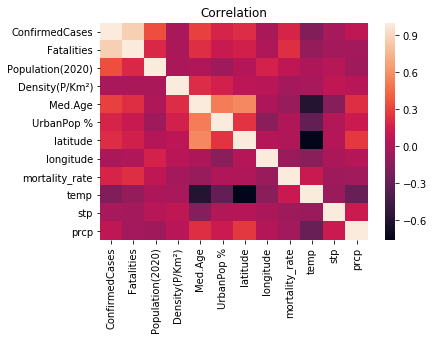

In [33]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns).set_title('Correlation')


In [34]:
train['Date_datetime'] = train['Date'].apply(lambda x: (datetime.datetime.strptime(x, '%Y-%m-%d')))
train.head()

Id Province_State Country_Region        Date  ConfirmedCases  Fatalities  \
0   1            NaN    Afghanistan  2020-01-22             0.0         0.0   
1   2            NaN    Afghanistan  2020-01-23             0.0         0.0   
2   3            NaN    Afghanistan  2020-01-24             0.0         0.0   
3   4            NaN    Afghanistan  2020-01-25             0.0         0.0   
4   5            NaN    Afghanistan  2020-01-26             0.0         0.0   

  Date_datetime  
0    2020-01-22  
1    2020-01-23  
2    2020-01-24  
3    2020-01-25  
4    2020-01-26

# PIPELINE REGRESSION

In [35]:
# using pipeline model for prediction of ConfirmedCases
for country in train['Country_Region'].unique():
    print ('training model for country ==>'+str(country))
    country_pd_train = train[train['Country_Region']==country]
    country_pd_test = test[test['Country_Region']==country]
    if country_pd_train['Province_State'].isna().unique().any()==True:
        x = np.array(range(len(country_pd_train))).reshape((-1,1))
        y = country_pd_train['ConfirmedCases']
        model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                         ('linear', LinearRegression(fit_intercept=False))])
        model = model.fit(x, y)
        predict_x = (np.array(range(len(country_pd_test)))+50).reshape((-1,1))
        test.loc[test['Country_Region']==country,'ConfirmedCases'] = model.predict(predict_x)
    else:
        for state in country_pd_train['Province_State'].unique():
            state_pd = country_pd_train[country_pd_train['Province_State']==state] 
            state_pd_test = country_pd_test[country_pd_test['Province_State']==state] 
            x = np.array(range(len(state_pd))).reshape((-1,1))
            y = state_pd['ConfirmedCases']
            model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                         ('linear', LinearRegression(fit_intercept=False))])
            model = model.fit(x, y)
            predict_x = (np.array(range(len(state_pd_test)))+50).reshape((-1,1))
            test.loc[(test['Country_Region']==country)&(test['Province_State']==state),'ConfirmedCases'] = model.predict(predict_x)

training model for country ==>Afghanistan
training model for country ==>Albania
training model for country ==>Algeria
training model for country ==>Andorra
training model for country ==>Angola
training model for country ==>Antigua and Barbuda
training model for country ==>Argentina
training model for country ==>Armenia
training model for country ==>Australia
training model for country ==>Austria
training model for country ==>Azerbaijan
training model for country ==>Bahamas
training model for country ==>Bahrain
training model for country ==>Bangladesh
training model for country ==>Barbados
training model for country ==>Belarus
training model for country ==>Belgium
training model for country ==>Belize
training model for country ==>Benin
training model for country ==>Bhutan
training model for country ==>Bolivia
training model for country ==>Bosnia and Herzegovina
training model for country ==>Brazil
training model for country ==>Brunei
training model for country ==>Bulgaria
training model

In [36]:
# using pipeline model for prediction of Fatalities
for country in train['Country_Region'].unique():
    print ('training model for country ==>'+str(country))
    country_pd_train = train[train['Country_Region']==country]
    country_pd_test = test[test['Country_Region']==country]
    if country_pd_train.loc[:,'Province_State'].isna().unique().any()==True:
        x = np.array(range(len(country_pd_train))).reshape((-1,1))
        y = country_pd_train['Fatalities']
        model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                         ('linear', LinearRegression(fit_intercept=False))])
        model = model.fit(x, y)
        predict_x = (np.array(range(len(country_pd_test)))+50).reshape((-1,1))
        test.loc[test['Country_Region']==country,'Fatalities'] = model.predict(predict_x)
    else:
        for state in country_pd_train['Province_State'].unique():
            state_pd = country_pd_train[country_pd_train['Province_State']==state] 
            state_pd_test = country_pd_test[country_pd_test['Province_State']==state] 
            x = np.array(range(len(state_pd))).reshape((-1,1))
            y = state_pd['Fatalities']
            model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                         ('linear', LinearRegression(fit_intercept=False))])
            model = model.fit(x, y)
            predict_x = (np.array(range(len(state_pd_test)))+50).reshape((-1,1))
            test.loc[(test['Country_Region']==country)&(test['Province_State']==state),'Fatalities'] = model.predict(predict_x)

training model for country ==>Afghanistan
training model for country ==>Albania
training model for country ==>Algeria
training model for country ==>Andorra
training model for country ==>Angola
training model for country ==>Antigua and Barbuda
training model for country ==>Argentina
training model for country ==>Armenia
training model for country ==>Australia
training model for country ==>Austria
training model for country ==>Azerbaijan
training model for country ==>Bahamas
training model for country ==>Bahrain
training model for country ==>Bangladesh
training model for country ==>Barbados
training model for country ==>Belarus
training model for country ==>Belgium
training model for country ==>Belize
training model for country ==>Benin
training model for country ==>Bhutan
training model for country ==>Bolivia
training model for country ==>Bosnia and Herzegovina
training model for country ==>Brazil
training model for country ==>Brunei
training model for country ==>Bulgaria
training model

In [37]:
test['Fatalities']=test['Fatalities'].astype('str')
test['ConfirmedCases']=test['ConfirmedCases'].astype('str')
test['Fatalities']=test['Fatalities'].str.replace('-','')
test['ConfirmedCases']=test['ConfirmedCases'].str.replace('-','')
test['Fatalities']=test['Fatalities'].astype('float')
test['ConfirmedCases']=test['ConfirmedCases'].astype('float')

In [38]:
# result of Linear regressive pipeline model
test.head()

ForecastId Province_State Country_Region        Date  ConfirmedCases  \
0           1            NaN    Afghanistan  2020-03-19       22.019164   
1           2            NaN    Afghanistan  2020-03-20       24.416812   
2           3            NaN    Afghanistan  2020-03-21       26.902987   
3           4            NaN    Afghanistan  2020-03-22       29.477688   
4           5            NaN    Afghanistan  2020-03-23       32.140916   

   Fatalities  
0    0.497447  
1    0.565663  
2    0.636572  
3    0.710175  
4    0.786472

In [39]:
submits = pd.DataFrame()
submits['ConfirmedCases'] = test['ConfirmedCases'].astype('int')
submits['Fatalities'] = test['Fatalities'].astype('int')

In [40]:
submits.describe()

ConfirmedCases    Fatalities
count    12642.000000  12642.000000
mean      1798.473738     82.225993
std       9859.875366    766.636698
min          0.000000      0.000000
25%         31.000000      0.000000
50%        168.500000      1.000000
75%        572.000000      9.000000
max     202284.000000  20097.000000

In [41]:
# regions=unique(countries+province)
for i in range(len(train)):
    if(pd.isna(train.loc[i,'Province_State'])==True):
        train.loc[i,'Lat']=train.loc[i,'Country_Region']
    else:
        train.loc[i,'Lat']=train.loc[i,'Country_Region']+str(train.loc[i,'Province_State'])
countries_list=train.Lat.unique()
df1=[]
for i in countries_list:
    df1.append(train[train['Lat']==i])
print("we have "+ str(len(df1))+" regions in our dataset")

we have 294 regions in our dataset


# ARIMA MODEL

In [42]:
# ARIMA MODEL PREDICTION.
submit_confirmed=[]
submit_fatal=[]
for i in df1:
    # contrived dataset
    data = i.ConfirmedCases.astype('int32').tolist()
    # fit model
    try:
        model = SARIMAX(data, order=(2,1,0), seasonal_order=(1,1,0,12))#seasonal_order=(1, 1, 1, 1))
        #model = ARIMA(data, order=(3,1,2))
        model_fit = model.fit(disp=False)
        # make prediction
        predicted = model_fit.predict(len(data), len(data)+34)
        new=np.concatenate((np.array(data),np.array([int(num) for num in predicted])),axis=0)
        submit_confirmed.extend(list(new[-43:]))
    except:
        submit_confirmed.extend(list(data[-10:-1]))
        for j in range(34):
            submit_confirmed.append(data[-1]*2)
    
    # contrived dataset
    data = i.Fatalities.astype('int32').tolist()
    # fit model
    try:
        model = SARIMAX(data, order=(2,1,0), seasonal_order=(1,1,0,12))#seasonal_order=(1, 1, 1, 1))
        #model = ARIMA(data, order=(3,1,2))
        model_fit = model.fit(disp=False)
        # make prediction
        predicted = model_fit.predict(len(data), len(data)+34)
        new=np.concatenate((np.array(data),np.array([int(num) for num in predicted])),axis=0)
        submit_fatal.extend(list(new[-43:]))
    except:
        submit_fatal.extend(list(data[-10:-1]))
        for j in range(34):
            submit_fatal.append(data[-1]*2)

df_submit=pd.concat([pd.Series(np.arange(1,1+len(submit_confirmed))),pd.Series(submit_confirmed),pd.Series(submit_fatal)],axis=1)

In [43]:
df_submit=df_submit.fillna(method='pad').astype(int)

In [44]:
s=df_submit

In [45]:
df_submit.index=test.Date
df_submit.columns=['Id','ConfirmedCases','Fatalities']

In [46]:
data_casess = pd.DataFrame(test.groupby(['Date'])['ConfirmedCases'].sum())
data_casess['Deaths'] = pd.DataFrame(test.groupby(['Date'])['Fatalities'].sum())
data_casess['Mortality_Rate']=(data_cases['Deaths']/data_cases['ConfirmedCases'])*100
data_casess.head()

ConfirmedCases        Deaths  Mortality_Rate
Date                                                    
2020-03-19   202094.979321   8187.182135        4.070914
2020-03-20   213239.637555   8723.861003        4.155526
2020-03-21   224706.221069   9277.283590        4.263746
2020-03-22   236494.729864   9847.449894        4.346305
2020-03-23   248605.163939  10434.359915        4.365682

# FUTURE PREDICTIONS

In [47]:
datas1=go.Bar(y=data_casess.ConfirmedCases, x=data_casess.index, name= 'Cases',xaxis='x1',yaxis='y1')
datas2=go.Bar(y=data_casess.Deaths, x=data_casess.index, name= 'Deaths',xaxis='x2',yaxis='y2')

fig = go.Figure(
    data=[datas1,datas2],
    layout=go.Layout(
        xaxis=dict(showgrid=False,domain=[0,0.45]),
        yaxis=dict(showgrid=False),
        xaxis2=dict(showgrid=False,domain=[0.55,1]),
        yaxis2=dict(showgrid=False,domain=[0, 1],anchor='x2'),
        title_text="PIPELINE REGREESION Forecast of Number of Confirmed Cases and Deaths WorldWide.",
        
    )
)
fig.show()

In [48]:
datas1=go.Bar(y=df_submit.ConfirmedCases, x=data_casess.index, name= 'Cases',xaxis='x1',yaxis='y1')
datas2=go.Bar(y=df_submit.Fatalities, x=data_casess.index, name= 'Deaths',xaxis='x2',yaxis='y2')

fig = go.Figure(
    data=[datas1,datas2],
    layout=go.Layout(
        xaxis=dict(showgrid=False,domain=[0,0.45]),
        yaxis=dict(showgrid=False),
        xaxis2=dict(showgrid=False,domain=[0.55,1]),
        yaxis2=dict(showgrid=False,domain=[0, 1],anchor='x2'),
        title_text="ARIMA Forecast of Number of Confirmed Cases and Deaths WorldWide.",
        
    )
)
fig.show()